In [27]:
adam batch size 64 cnn

SyntaxError: invalid syntax (4169475141.py, line 1)

In [1]:
# Essential and common packages
import os
import glob

# Read and visualize the raster data
import rasterio
from rasterio.plot import show++++

# Plots and bars
import matplotlib.pyplot as plt
import seaborn as sns

# Computation library
import numpy as np

# TensorFlow for building the CNN model
import tensorflow as tf
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout)
from tensorflow.keras.models import Model

# Sklearn for confusion matrix
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For visualization of plots inside Jupyter Notebook
%matplotlib inline

In [3]:
# Dataset parameters
dataset_url = r"C:\Users\Welcome\2750"
batch_size = 64
img_height = 64
img_width = 64
validation_split = 0.2
rescale = 1.0 / 255

# Data augmentation and loading
datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=validation_split, rescale=rescale)
train_dataset = datagen.flow_from_directory(batch_size=batch_size,
                                             directory=dataset_url,
                                             shuffle=True,
                                             target_size=(img_height, img_width),
                                             subset="training",
                                             class_mode='categorical')
test_dataset = datagen.flow_from_directory(batch_size=batch_size,
                                            directory=dataset_url,
                                            shuffle=True,
                                            target_size=(img_height, img_width),
                                            subset="validation",
                                            class_mode='categorical')

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [5]:
# Define a simple CNN model
def create_cnn_model(input_shape=(64, 64, 3), classes=10):
    model = tf.keras.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))
    
    return model

# Create model
model = create_cnn_model(input_shape=(img_height, img_width, 3), classes=10)

# Print model summary
model.summary()

C:\Users\Welcome\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,490 (2.61 MB)

 Trainable params: 684,490 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(train_dataset, validation_data=test_dataset, epochs=100, batch_size=batch_size)

Epoch 1/100


C:\Users\Welcome\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


338/338 ━━━━━━━━━━━━━━━━━━━━ 88s 250ms/step - accuracy: 0.2938 - loss: 1.8109 - val_accuracy: 0.5693 - val_loss: 1.2496
Epoch 2/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 144s 254ms/step - accuracy: 0.5834 - loss: 1.1416 - val_accuracy: 0.7228 - val_loss: 0.7901
Epoch 3/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 85s 252ms/step - accuracy: 0.6718 - loss: 0.9209 - val_accuracy: 0.7496 - val_loss: 0.6903
Epoch 4/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 86s 253ms/step - accuracy: 0.7124 - loss: 0.8228 - val_accuracy: 0.7737 - val_loss: 0.6177
Epoch 5/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 124s 198ms/step - accuracy: 0.7321 - loss: 0.7671 - val_accuracy: 0.7274 - val_loss: 0.7414
Epoch 6/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 84s 248ms/step - accuracy: 0.7486 - loss: 0.7160 - val_accuracy: 0.7813 - val_loss: 0.6139
Epoch 7/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 85s 250ms/step - accuracy: 0.7707 - loss: 0.6549 - val_accuracy: 0.8109 - val_loss: 0.5157
Epoch 8/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 142s 250ms/step - accuracy: 0.7916 - loss: 0.

In [11]:
# Save the model
model.save('my_cnn_model.keras')

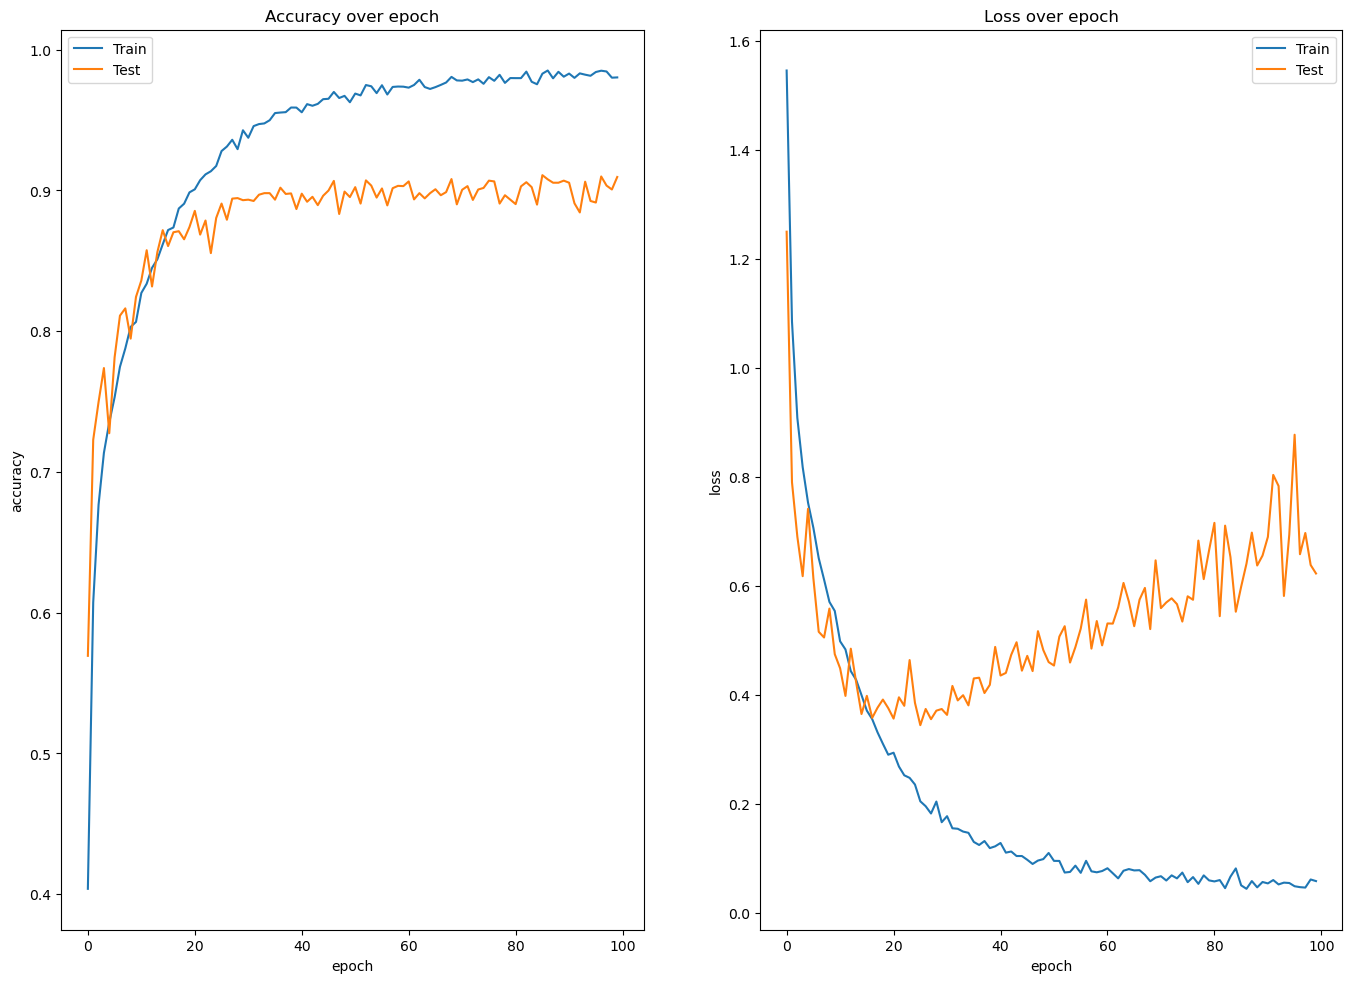

In [13]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16.53, 11.69))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.set_title('Accuracy over epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.set_title('Loss over epoch')
ax2.legend(['Train', 'Test'], loc="upper right")
plt.show()

In [15]:
# Evaluate the model
y_pred = []  # store predicted labels
y_true = []  # store true labels

# Iterate over the dataset
for i, (image_batch, label_batch) in enumerate(test_dataset):
    # Append true labels
    y_true.append(label_batch)
    # Compute predictions
    preds = model.predict(image_batch)
    # Append predicted labels
    y_pred.append(np.argmax(preds, axis=1))
    if i == 300:
        break

# Convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis=0)
correct_labels = np.argmax(correct_labels, axis=1)
predicted_labels = tf.concat([item for item in y_pred], axis=0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━

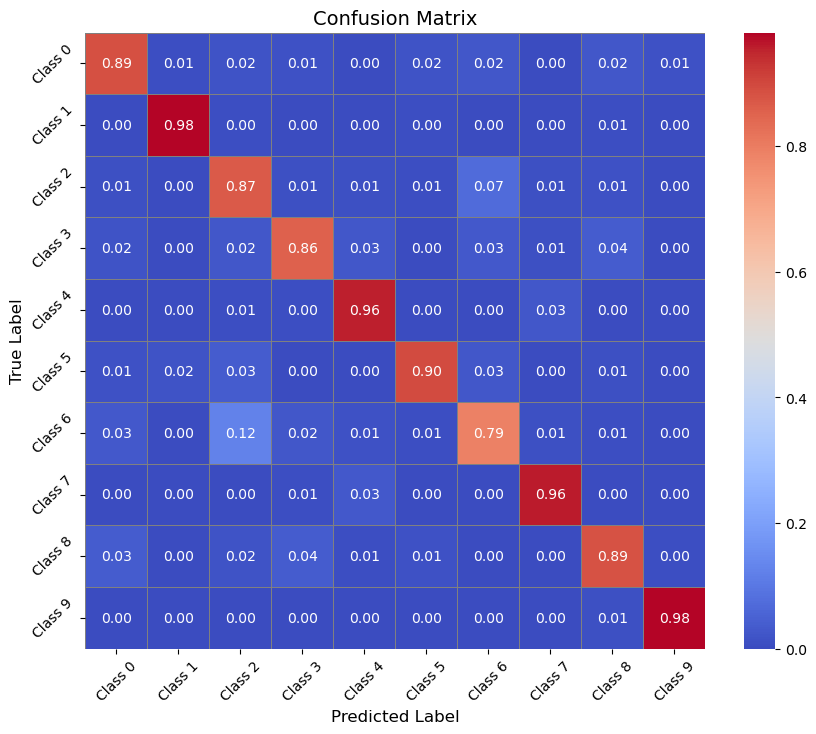

In [17]:
# Confusion matrix
cm = confusion_matrix(correct_labels, predicted_labels)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          figsize=(10, 8),
                          cmap="coolwarm"):
    plt.figure(figsize=figsize)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d",
                cmap=cmap, linewidths=0.5, linecolor='gray',
                xticklabels=classes, yticklabels=classes)
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

# Define class labels
class_labels = [f'Class {i}' for i in range(10)]

# Call function to plot confusion matrix
plot_confusion_matrix(cm, class_labels, normalize=True, cmap="coolwarm")